In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


In [2]:
df = pd.read_csv('population-growth-nairobi-1950-2035.csv')
df

,growth,growthRate,population,year
0,309189,0.037751,8499403,2035
1,301867,0.038267,8190214,2034
2,294035,0.038718,7888347,2033
3,285808,0.039106,7594312,2032
4,277613,0.039485,7308504,2031
...,...,...,...,...
81,13530,0.078470,185953,1954
82,12530,0.078365,172423,1953
83,11650,0.078587,159893,1952
84,10787,0.078476,148243,1951


In [3]:
df.shape

(86, 4)

In [4]:
print(df.isna().sum())
print('There is no NaN value')

growth        0
growthRate    0
population    0
year          0
dtype: int64
There is no NaN value


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   growth      86 non-null     int64  
 1   growthRate  86 non-null     float64
 2   population  86 non-null     int64  
 3   year        86 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


In [6]:
df.describe()

,growth,growthRate,population,year
count,86.000000,86.000000,8.600000e+01,86.000000
mean,97231.941860,0.049220,2.431711e+06,1992.500000
std,84259.669681,0.014093,2.306386e+06,24.969982
min,0.000000,0.000000,1.374560e+05,1950.000000
25%,27558.250000,0.038796,5.641095e+05,1971.250000
50%,73149.000000,0.048133,1.556941e+06,1992.500000
75%,139114.500000,0.049839,3.732546e+06,2013.750000
max,309189.000000,0.078587,8.499403e+06,2035.000000


### Outliers

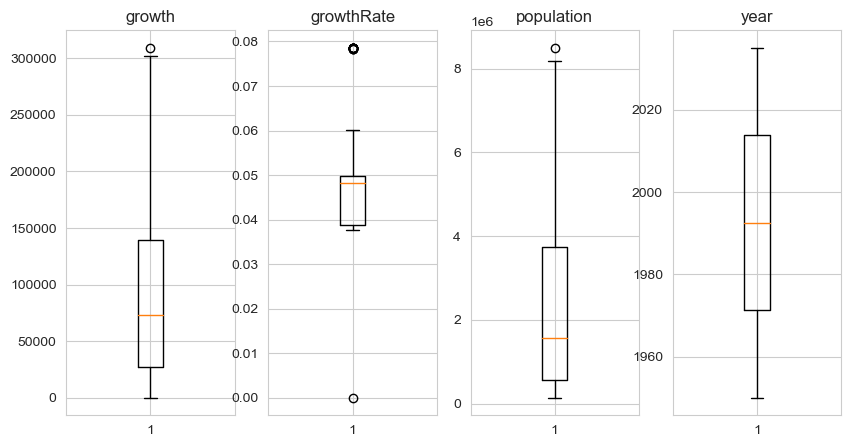

In [7]:
columns = ['growth','growthRate','population','year']
fig, axs = plt.subplots(ncols=len(columns), figsize=(10, 5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

In [8]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    df[columns] = stats.zscore(df[columns])
    outliers = df[(df[columns] < -3) | (df[columns] > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
    df = df[(df[columns] > -3) & (df[columns] < 3)].reset_index(drop=True)
    return df


In [9]:
detect_outliers(df,'growthRate')

The number of outliers: 1


,growth,growthRate,population,year
0,309189,-0.818611,8499403,2035
1,301867,-0.781751,8190214,2034
2,294035,-0.749609,7888347,2033
3,285808,-0.721885,7594312,2032
4,277613,-0.694868,7308504,2031
...,...,...,...,...
80,14593,2.088146,200546,1955
81,13530,2.087645,185953,1954
82,12530,2.080158,172423,1953
83,11650,2.096023,159893,1952


In [10]:
df

,growth,growthRate,population,year
0,309189,0.037751,8499403,2035
1,301867,0.038267,8190214,2034
2,294035,0.038718,7888347,2033
3,285808,0.039106,7594312,2032
4,277613,0.039485,7308504,2031
...,...,...,...,...
81,13530,0.078470,185953,1954
82,12530,0.078365,172423,1953
83,11650,0.078587,159893,1952
84,10787,0.078476,148243,1951


### Binning for analytics

In [11]:
pd.cut(df['year'], bins=2).value_counts()

(1949.915, 1992.5]    43
(1992.5, 2035.0]      43
Name: year, dtype: int64

In [12]:
labels = ['Late 20th Century','21st Century']

In [13]:
cut_bins = [1950,2000,2035]
df['Historical'] = pd.cut(df['year'], bins=cut_bins, labels=labels)

In [14]:
df.head()

,growth,growthRate,population,year,Historical
0,309189,0.037751,8499403,2035,21st Century
1,301867,0.038267,8190214,2034,21st Century
2,294035,0.038718,7888347,2033,21st Century
3,285808,0.039106,7594312,2032,21st Century
4,277613,0.039485,7308504,2031,21st Century
